In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import glob

In [3]:
x = np.load('classPred032322.npz')
classScore = x['x']
numClassLabel = [0, 1, 2, 3] # ["Colon","Esophagus", "Breast",  "Pancreas"]
classLabel = ["Colon","Esophagus", "Breast",  "Pancreas"]

In [4]:
base_path = 'E:\\MvP\\FinalExperimentWithPancreas\\NewRNG\\Run3\\DeepLearningHeatmap\\OrganSiteClassifying\\Test1\\**\\'
input_pattern = '*.png'
files = glob.glob(base_path + input_pattern)

In [5]:
trueLabel = np.zeros((classScore.shape[0],), dtype=float)
caseID = []
for i in range(len(files)):
    nn =  files[i].split('\\')[-1]
    caseID.append(nn.split('_')[0])
    fname = files[i].strip()
    if "Colon" in fname:
        trueLabel[i] = 0
    elif "Esophagus" in fname:
        trueLabel[i] = 1
    elif "Breast" in fname:
        trueLabel[i] = 2    
    elif "Pancreas" in fname:
        trueLabel[i] = 3    


In [6]:
cID = np.array(caseID)

In [7]:
score = np.zeros((classScore.shape[0],4), dtype=float)


In [8]:
for i in range(classScore.shape[0]):
    ss = classScore[i,:,:]
    tileClass = np.argmax(ss, axis=1)
    predc,predccounts=np.unique(tileClass, return_counts=True)
    for c,cc in zip(predc,predccounts):
        score[i,c] = cc/(ss.shape[0])

In [9]:
prediction = np.argmax(score,1)
prediction.shape

(16207,)

In [10]:
fpr = dict()
tpr = dict()
roc_auc = dict()
colorsRaw = 'r', 'b', 'g', 'orange'
for i in numClassLabel:
    fpr[i], tpr[i], _ = metrics.roc_curve(trueLabel, score[:,i], pos_label=i)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

In [11]:
roc_auc

{0: 0.7684892918363007,
 1: 0.6128595241318621,
 2: 0.6850045225520257,
 3: 0.4913264750502729}

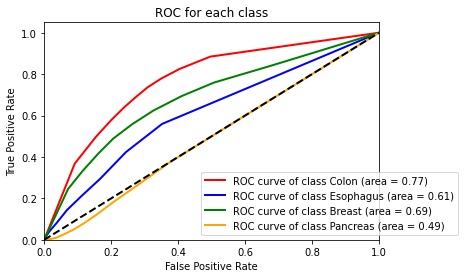

In [12]:
lw = 2
for i, color in zip(range(4), colorsRaw):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label=f"ROC curve of class {classLabel[i]} (area = {roc_auc[i]:0.2f})"
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for each class")
plt.legend(bbox_to_anchor=(1.25,0), loc="lower right")
plt.show()

In [13]:
# np.vstack
patientScore = np.empty((0,4),dtype = float)
truePatientLabel = np.empty((0,),dtype = float)
for i in range(4):
    crit = trueLabel == i
    cc_same_organ = cID[crit]
    predSameOrgan = prediction[crit]
    uniqueCaseID = np.unique(cc_same_organ)
    ll = np.zeros((len(uniqueCaseID,)))+i
    truePatientLabel = np.append(truePatientLabel,ll,axis=0)
    for j in uniqueCaseID:
        ucID = j
        critID = cc_same_organ == ucID
        predSameID = predSameOrgan[critID]
#         crit0 = predSameID == 0
#         crit1 = predSameID == 1
#         crit2 = predSameID == 2
#         crit3 = predSameID == 3
        sTemp = np.array([[sum(predSameID == x) for x in range(4)]])/len(predSameID)
        patientScore = np.append(patientScore,sTemp,axis=0)
    
        

In [14]:
truePatientLabel.shape

(54,)

In [15]:
patientScore.shape

(54, 4)

In [ ]:
np.savetxt("patientScore.csv", patientScore, delimiter=",")

In [19]:
fpr_patient = dict()
tpr_patient = dict()
roc_auc_patient = dict()
colorsRaw = 'r', 'b', 'g', 'orange'
for i in numClassLabel:
    fpr_patient[i], tpr_patient[i], _ = metrics.roc_curve(truePatientLabel, patientScore[:,i], pos_label=i)
    roc_auc_patient[i] = metrics.auc(fpr_patient[i], tpr_patient[i])

In [16]:
fpr_patient = dict()
tpr_patient = dict()
roc_auc_patient = dict()
colorsRaw = 'r', 'b', 'g', 'orange'
for i in numClassLabel:
    fpr_patient[i], tpr_patient[i], _ = metrics.roc_curve(truePatientLabel, patientScore[:,i], pos_label=i)
    roc_auc_patient[i] = metrics.auc(fpr_patient[i], tpr_patient[i])

In [17]:
roc_auc_patient

{0: 0.9427662957074722,
 1: 0.6553911205073996,
 2: 0.7946428571428572,
 3: 0.673611111111111}

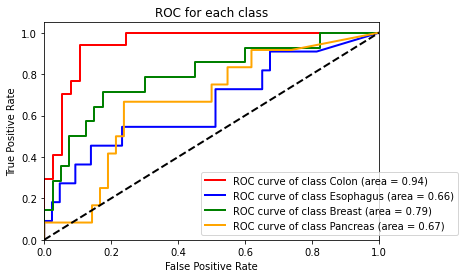

In [18]:
for i, color in zip(range(4), colorsRaw):
    plt.plot(
        fpr_patient[i],
        tpr_patient[i],
        color=color,
        lw=lw,
        label=f"ROC curve of class {classLabel[i]} (area = {roc_auc_patient[i]:0.2f})"
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for each class")
plt.legend(bbox_to_anchor=(1.25,0), loc="lower right")
plt.show()

In [20]:
cc

5

In [ ]:
# Primary vs Mets

In [2]:
x = np.load('E:\\MvP\\FinalExperimentWithPancreas\\NewRNG\\Run3\\PvM\\classPred.npz')
classScore = x['x']
numClassLabel = [0, 1] #["Colon","Esophagus", "Breast",  "Pancreas"]
classLabel = ["Pri","Met"]
base_path = 'E:\\MvP\\FinalExperimentWithPancreas\\NewRNG\\Run3\\DeepLearningHeatmap\\PvM\\Test\\**\\'
input_pattern = '*.png'
files = glob.glob(base_path + input_pattern)

In [3]:
trueLabel = np.zeros((classScore.shape[0],), dtype=float)
caseID = []
for i in range(len(files)):
    nn =  files[i].split('\\')[-1]
    caseID.append(nn.split('_')[0])
    fname = files[i].strip()
    if "Pri" in fname:
        trueLabel[i] = 0
    elif "Met" in fname:
        trueLabel[i] = 1



In [4]:
cID = np.array(caseID)
score = np.zeros((classScore.shape[0],2), dtype=float)
for i in range(classScore.shape[0]):
    ss = classScore[i,:,:]
    tileClass = np.argmax(ss, axis=1)
    predc,predccounts=np.unique(tileClass, return_counts=True)
    for c,cc in zip(predc,predccounts):
        score[i,c] = cc/(ss.shape[0])

In [5]:
prediction = np.argmax(score,1)
prediction.shape

(39315,)

In [6]:
fpr = dict()
tpr = dict()
roc_auc = dict()
colorsRaw = 'r', 'b', 'g', 'orange'
for i in numClassLabel:
    fpr[i], tpr[i], _ = metrics.roc_curve(trueLabel, score[:,i], pos_label=i)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

In [7]:
roc_auc

{0: 0.7507203366747753, 1: 0.7507203366747754}

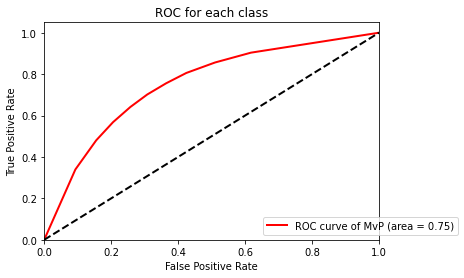

In [8]:
lw = 2
for i, color in zip(range(1), colorsRaw):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label=f"ROC curve of MvP (area = {roc_auc[i]:0.2f})"
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for each class")
plt.legend(bbox_to_anchor=(1.25,0), loc="lower right")
plt.show()

In [23]:
patientScore = np.empty((0,2),dtype = float)
truePatientLabel = np.empty((0,),dtype = float)
for i in range(2):
    crit = trueLabel == i
    cc_same_organ = cID[crit]
    predSameOrgan = prediction[crit]
    uniqueCaseID = np.unique(cc_same_organ)
    ll = np.zeros((len(uniqueCaseID,)))+i
    truePatientLabel = np.append(truePatientLabel,ll,axis=0)
    for j in uniqueCaseID:
        ucID = j
        critID = cc_same_organ == ucID
        predSameID = predSameOrgan[critID]
#         crit0 = predSameID == 0
#         crit1 = predSameID == 1
#         crit2 = predSameID == 2
#         crit3 = predSameID == 3
        sTemp = np.array([[sum(predSameID == x) for x in range(2)]])/len(predSameID)
        patientScore = np.append(patientScore,sTemp,axis=0)
    
        

In [24]:
fpr_patient = dict()
tpr_patient = dict()
roc_auc_patient = dict()
colorsRaw = 'r', 'b', 'g', 'orange'
for i in numClassLabel:
    fpr_patient[i], tpr_patient[i], _ = metrics.roc_curve(truePatientLabel, patientScore[:,i], pos_label=i)
    roc_auc_patient[i] = metrics.auc(fpr[i], tpr[i])

In [25]:
roc_auc_patient

{0: 0.7507203366747753, 1: 0.7507203366747754}

In [ ]:
for i, color in zip(range(1), colorsRaw):
    plt.plot(
        fpr_patient[i],
        tpr_patient[i],
        color=color,
        lw=lw,
        label=f"ROC curve of MvP (area = {roc_auc_patient[i]:0.2f})"
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for each class")
plt.legend(bbox_to_anchor=(1.25,0), loc="lower right")
plt.show()

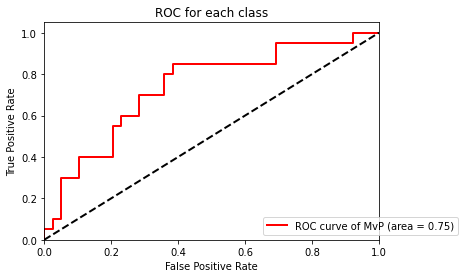